# Dog recognition app

This is an app that takes an image URL and return the dog breed with highest probability. The model used is the fine-tuned Inception V3 from previous notebook.

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import tensorflow as tf
import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.inception_v3 import preprocess_input
from keras.layers import Dropout
from tensorflow import keras
import cv2
from glob import glob

from keras.models import model_from_json
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

import urllib
import pickle

In [37]:
# load Inception V3 model
json_file = open('inceptionV3_120_breeds_best.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into model
loaded_model.load_weights("inceptionV3_120_breeds_best.h5")

#load dictionary
class_dogs = pickle.load(open(r'class.pkl', 'rb'))

enter image URL:https://www.cdc.gov/healthypets/images/pets/cute-dog-headshot.jpg
predicted breed: Blenheim_spaniel


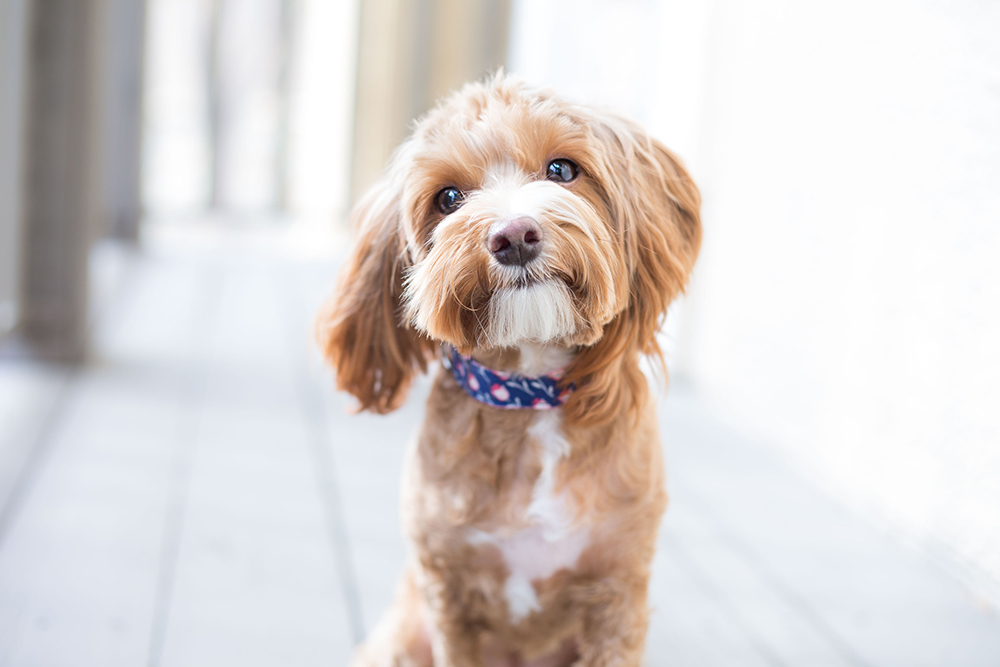

In [44]:
URL=input('enter image URL:')

with urllib.request.urlopen(URL) as url:
  with open('dog.jpg', 'wb') as f:
      f.write(url.read())

# load the image
img = load_img(('dog.jpg'))
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rescale=1./255)
# prepare iterator
image = datagen.flow(samples, batch_size=1)

# return dog breed id with highest probability
predict_id = np.argmax(loaded_model.predict(image))

# retrieve dog breed name based on id
for name, value in class_dogs.items():
  if value == predict_id:
      dog_breed=name

print(f'predicted breed: {dog_breed}')
img